In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df_train = pd.read_csv("/kaggle/input/sentnob-sentiment-analysis-in-noisy-bangla-texts/SentNoB Dataset/Train.csv")

In [3]:
df_train.head()

,Data,Label
0,মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো তোম...,1
1,এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তায়...,2
2,ভাই আপনার কথাই যাদু রয়েছে,1
3,উওরটা আমার অনেক ভাল লেগেছে,1
4,আমার নিজের গাড়ী নিয়ে কি সাজেক যেতে পারবো না ?...,0


In [4]:
df_train.dropna(inplace=True)

In [5]:
longest_string = max(df_train["Data"], key=len)
print(len(longest_string))

372


In [6]:
df_train['Label'].value_counts()

Label
1    5133
2    4548
0    2894
Name: count, dtype: int64

In [7]:
df_train['Label'] = df_train['Label'].replace({0: 'Neutral', 1: 'Positive', 2: 'Negative'})

In [8]:
df_val = pd.read_csv("/kaggle/input/sentnob-sentiment-analysis-in-noisy-bangla-texts/SentNoB Dataset/Val.csv")

In [9]:
df_val.dropna(inplace=True)

In [10]:
df_val['Label'].value_counts()

Label
1    623
2    590
0    354
Name: count, dtype: int64

In [11]:
df_val['Label'] = df_val['Label'].replace({0: 'Neutral', 1: 'Positive', 2: 'Negative'})

In [12]:
df_val['Label'].value_counts()

Label
Positive    623
Negative    590
Neutral     354
Name: count, dtype: int64

In [13]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit and transform the text data
tfidf_matrix = tfidf.fit_transform(df_train['Data'])

# Get feature names (words)
feature_names = tfidf.get_feature_names_out()

# Create a DataFrame of TF-IDF scores
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Find mean TF-IDF score for each word across all documents
word_scores = tfidf_df.mean(axis=0)

# Set a threshold to identify less important words (adjust threshold as needed)
threshold = 0.00005 # For example, you can set a threshold value

# Get less important words based on threshold
less_important_words = word_scores[word_scores < threshold]

# Display words that will be removed
print("Less important words:")
print(less_important_words)

Less important words:
007            0.000042
01614000789    0.000046
01618804890    0.000046
01625959562    0.000038
01681003067    0.000034
                 ...   
৮৫৭            0.000045
৮৭             0.000047
৮৯             0.000030
৯৬             0.000041
ৱত             0.000050
Length: 943, dtype: float64


In [14]:
# Function to remove less important words
def remove_less_important_words(text):
    words = text.split()
    filtered_words = [word for word in words if word not in less_important_words]
    return ' '.join(filtered_words)

In [15]:
df_train['Data'] = df_train['Data'].apply(remove_less_important_words)
df_val['Data'] = df_val['Data'].apply(remove_less_important_words)

In [16]:
df_train.tail(10)

,Data,Label
12565,সারা বাংলাদেশের মানুষের একটা দাবি ভুয়া লটারি ক...,Positive
12566,ডিসেমবরে শেষের দিকে গেলে বরফ পাবো দাদা,Neutral
12567,অনেক সুন্দর রাস্তা দার্জিলিয়ের যা এখন পর্যন্ত ...,Positive
12568,"আমি বুজতে পারি না , ওরা আমাদেরকে তিস্তার পানি ...",Neutral
12569,জত দিন জাচ্ছে তত আপনাদের ভিডিও বের হচ্ছে দেখে ...,Positive
12570,বর্ডারে অনেক লেট হয়ে যাওয়াতে আমরা জিপে করে চলে...,Positive
12571,আমার সোনার বাংলাতে এমন রক্ষক নামের ভক্ষকের কোন...,Negative
12572,ওনারা এত হাইজিনিক ও এত সুন্দর পরিবেশে রান্না ক...,Positive
12573,বাংলাদেশ আমরা পুলিশ চাই না এই ধরনে পুলিশ দরকার...,Negative
12574,বসুন্ধরা শাখার হাজি বিরিয়ানি একবারেই ফালতু,Negative


In [17]:
df_train["Label"].value_counts()

Label
Positive    5133
Negative    4548
Neutral     2894
Name: count, dtype: int64

In [18]:
# from sklearn.model_selection import train_test_split

# train_df, test_df = train_test_split(, test_size=0.2,stratify=df['classes'],random_state=42)


In [19]:
X_train  =  df_train['Data'].values.tolist()
y_train = df_train['Label'].tolist()

In [20]:
X_test =  df_val['Data'].values.tolist()
y_test = df_val['Label'].tolist()

In [21]:
pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 45.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 25.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 13.1 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.40.0-py3-none-any.whl size=25319454 sha256=5ffb61a2ba2f4ed81f14d413cc31980e93abee7710e722dfa30d4b4824f951ee
  Stored in directory: /root

In [22]:
import ktrain
from ktrain import text
MODEL_NAME = 'FacebookAI/xlm-roberta-base'
t = text.Transformer(MODEL_NAME, maxlen=500)

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

In [23]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 15
	95percentile : 36
	99percentile : 47


sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 16
	95percentile : 37
	99percentile : 47


In [24]:
print(trn)

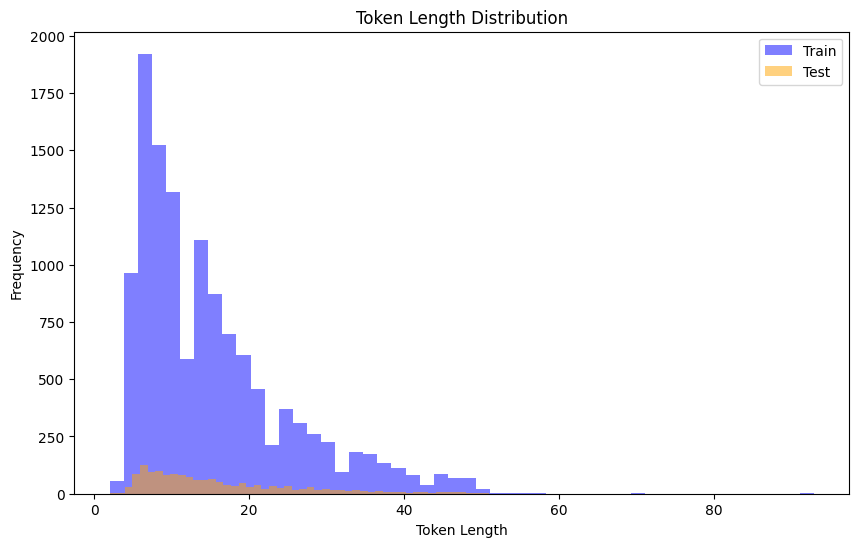

In [25]:
import matplotlib.pyplot as plt

# Calculate token lengths for train and test datasets
train_token_lengths = [len(t.split()) for t in X_train]
test_token_lengths = [len(t.split()) for t in X_test]

# Plot token length distribution
plt.figure(figsize=(10, 6))
plt.hist(train_token_lengths, bins=50, alpha=0.5, color='blue', label='Train')
plt.hist(test_token_lengths, bins=50, alpha=0.5, color='orange', label='Test')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Token Length Distribution')
plt.legend()
plt.show()

In [26]:
model = t.get_classifier()

In [27]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=8)

In [28]:
# Adding early stopping callback from TensorFlow
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='accuracy', patience=5, mode='auto')

In [29]:
history = learner.fit_onecycle(2e-5, 10,callbacks=[early_stopping])



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
1572/1572 [==============================] - 977s 604ms/step - loss: 0.9311 - accuracy: 0.5600 - val_loss: 0.7974 - val_accuracy: 0.6471
Epoch 2/10
1572/1572 [==============================] - 946s 602ms/step - loss: 0.7840 - accuracy: 0.6588 - val_loss: 0.7191 - val_accuracy: 0.6847
Epoch 3/10
1572/1572 [==============================] - 946s 602ms/step - loss: 0.7132 - accuracy: 0.6941 - val_loss: 0.7331 - val_accuracy: 0.7033
Epoch 4/10
1572/1572 [==============================] - 946s 602ms/step - loss: 0.6453 - accuracy: 0.7294 - val_loss: 0.7273 - val_accuracy: 0.6988
Epoch 5/10
1572/1572 [==============================] - 946s 602ms/step - loss: 0.5785 - accuracy: 0.7622 - val_loss: 0.7355 - val_accuracy: 0.7128
Epoch 6/10
1572/1572 [==============================] - 946s 602ms/step - loss: 0.4899 - accuracy: 0.8045 - val_loss: 0.6881 - val_accuracy: 0.7173
Epoch 7/10
1572/1572 [===========================

In [30]:
# Save the trained model
learner.save_model('/kaggle/output/bemoc.zip')

In [31]:
classes=t.get_classes()

In [32]:
cm = learner.validate(class_names=t.get_classes())

49/49 [==============================] - 11s 156ms/step
              precision    recall  f1-score   support

    Negative       0.82      0.76      0.79       590
     Neutral       0.54      0.53      0.53       354
    Positive       0.77      0.84      0.80       623

    accuracy                           0.74      1567
   macro avg       0.71      0.71      0.71      1567
weighted avg       0.74      0.74      0.74      1567



In [33]:
import os
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))

In [34]:
!zip -r mental.zip /kaggle/output/mental-health-rand

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


	zip warning: name not matched: /kaggle/output/mental-health-rand

zip error: Nothing to do! (try: zip -r mental.zip . -i /kaggle/output/mental-health-rand)


In [35]:
!ls

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


__notebook__.ipynb


In [36]:
# from IPython.display import FileLink
# FileLink(r'/kaggle/working/mental-health-rand.zip')

In [37]:
# df_cm = pd.DataFrame(cm, index=["Anxiety","Bipolar","Borderline Personality", "Depression ", "Schizophernia","Suidal Thought","neutral",
#                                 "Alcoholism","Addiction","Aspergers","SelfHarm "],
#                      columns=["Anxiety","Bipolar","Borderline Personality", "Depression ", "Schizophernia","Suidal Thought","neutral",
#                                 "Alcoholism","Addiction","Aspergers","SelfHarm "])
# plt.figure(figsize = (10,7))
# sns.heatmap(df_cm,annot=True, fmt ="d")